 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources\whale_returns.csv")
whale_returns = pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


# Count nulls

#Code:

whale_returns.isna()

print(whale_returns.isna().sum().sum())

In [3]:
#Below is my pre-work to figure out the correct way to count nulls
"""dfObj = pd.DataFrame(whale_returns, columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"])
dfObj.isnull()
dfObj.isnull().sum().sum()
count = dfObj.isnull().sum().sum()"""

"""for i in range(len(dfObj.index)) :
                    print("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())
Nan = ("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())                   
print(count)"""

#Used "isna" to detect missing values for an array-like object.
whale_returns.isna()

#Used the "isna" and sum function to get the total
print(whale_returns.isna().sum().sum())



4


# Drop nulls

Code:

whale_returns.dropna()

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()



In [5]:
whale_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_returns_data = whale_returns.copy()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)



In [8]:
# Count nulls
print(algo_returns.isna().sum().sum())

6


In [9]:
# Drop nulls
algo_returns.dropna()
algo_returns = algo_returns.dropna()


In [10]:
algo_returns 

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
algo_returns_data = algo_returns.copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_Closing_Prices = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_Closing_Prices.sort_index(inplace = True)
sp500_Closing_Prices.head()

SP_Close = sp500_Closing_Prices
print(SP_Close)

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [13]:
#Check Data Types
#Used the data type function to determine the data type is an object
SP_Close.dtypes


Close    object
dtype: object

In [14]:
# Fix Data Types
#Needed to replace the $ so that the amounts are no longer strings but intergers 
SP_Close["Close"] = SP_Close["Close"].str.replace("$", "")
SP_Close.head()







C:\Users\Jamel\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
#Making a copy of this dataframe so I do not have to go through this process in the future
SP_Close_data = SP_Close.copy()

In [16]:
# Calculate Daily Returns

SP_Close["Close"] = SP_Close["Close"].astype("float64")
SP_Close["Close"] = SP_Close["Close"].pct_change(1)
SP_Close.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
SP_Close.dropna(inplace=True)



In [18]:
#Confirmed NaN values were dropped
SP_Close.isna().sum().sum()

0

In [19]:
#Rename `Close` Column to be specific to this portfolio.
SP_Close.columns = ["S&P 500 Daily Close"]
SP_Close.head()

,S&P 500 Daily Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_oringinal_returns = pd.concat([whale_returns_data, algo_returns_data, SP_Close_data], axis = "columns",join = "inner")
daily_oringinal_returns





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Calculated Daily Returns

In [21]:

#daily_returns_of_all_assets = df.pct_change
#head() 
#df.dropna()

daily_oringinal_returns["Close"] = daily_oringinal_returns["Close"].astype("float64")
daily_oringinal_returns["Close"] = daily_oringinal_returns["Close"].pct_change(1)
daily_oringinal_returns.head()


                            


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [22]:
#Removed NaN with the dropna function and checked with a isna count

daily_oringinal_returns.dropna(inplace=True)
daily_oringinal_returns.isna().sum().sum()

0

Rename The Columns 

In [23]:
#Renamed columns so S&P was reflected in the dataframe 
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1 ", "Algo 2", "S&P_Close"]
daily_oringinal_returns.columns = columns
daily_oringinal_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

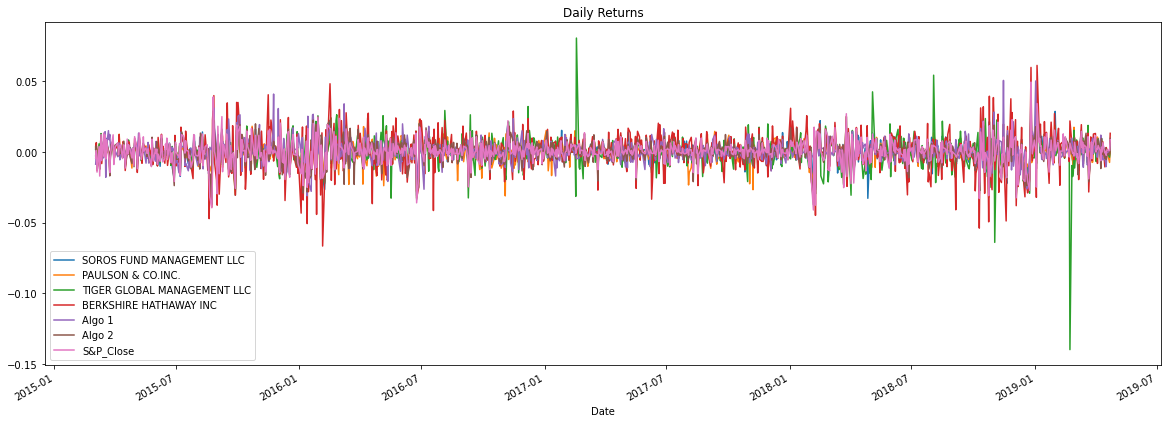

In [24]:
#combined_returns.plot( title="Daily Returns" , figsize=(20,10))
#df['daily_return'] = df['close'].pct_change()
daily_oringinal_returns.plot(title="Daily Returns",  figsize=(20,7))

#### Calculate and Plot cumulative returns.

Calculate cumulative returns of all portfolios

In [25]:

#cumsum = series.cumsum()
cumulative_returns = daily_oringinal_returns.cumsum()
cumulative_returns






,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.006246,0.007317,-0.000179,0.010939,-0.009544,0.006739,-0.003192
2015-03-06,-0.001659,0.003743,-0.008660,-0.002159,-0.014501,-0.004721,-0.017366
2015-03-09,-0.001077,0.007969,-0.002818,-0.003811,-0.019948,-0.003418,-0.013422
2015-03-10,-0.011340,0.002628,-0.014897,-0.013550,-0.021339,-0.015573,-0.030383
...,...,...,...,...,...,...,...
2019-04-16,0.183023,-0.209063,-0.085158,0.517027,0.697431,0.274524,0.359709
2019-04-17,0.180127,-0.215530,-0.089568,0.520249,0.687130,0.269296,0.357435
2019-04-18,0.181575,-0.214308,-0.088986,0.522165,0.686542,0.268067,0.359014


Plot cumulative returns of all portfolios

<AxesSubplot:xlabel='Date'>

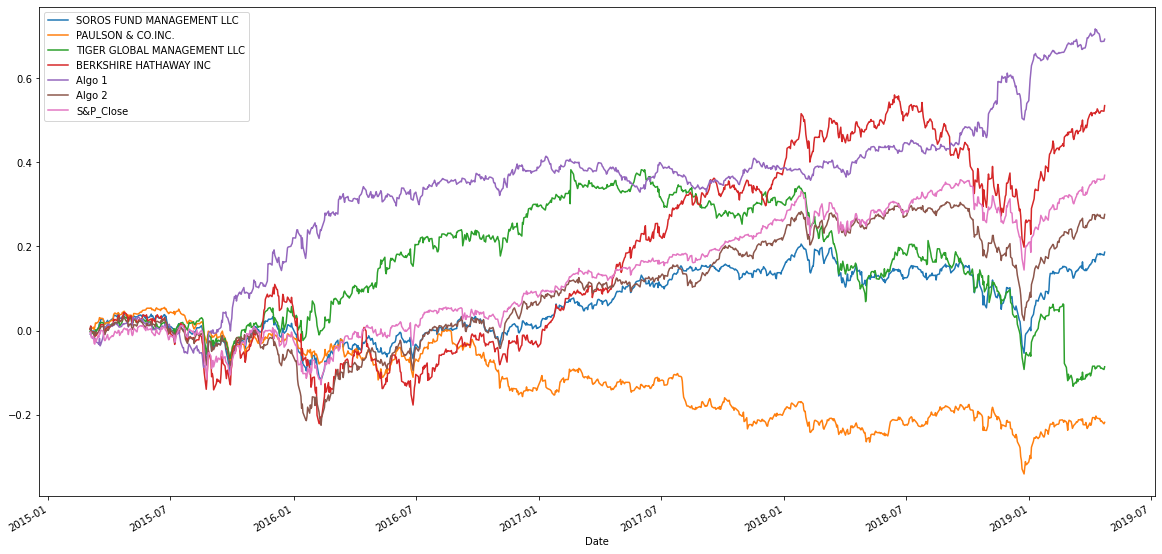

In [26]:
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Box plot to visually show risk

<AxesSubplot:title={'center':'portfolio Risk'}>

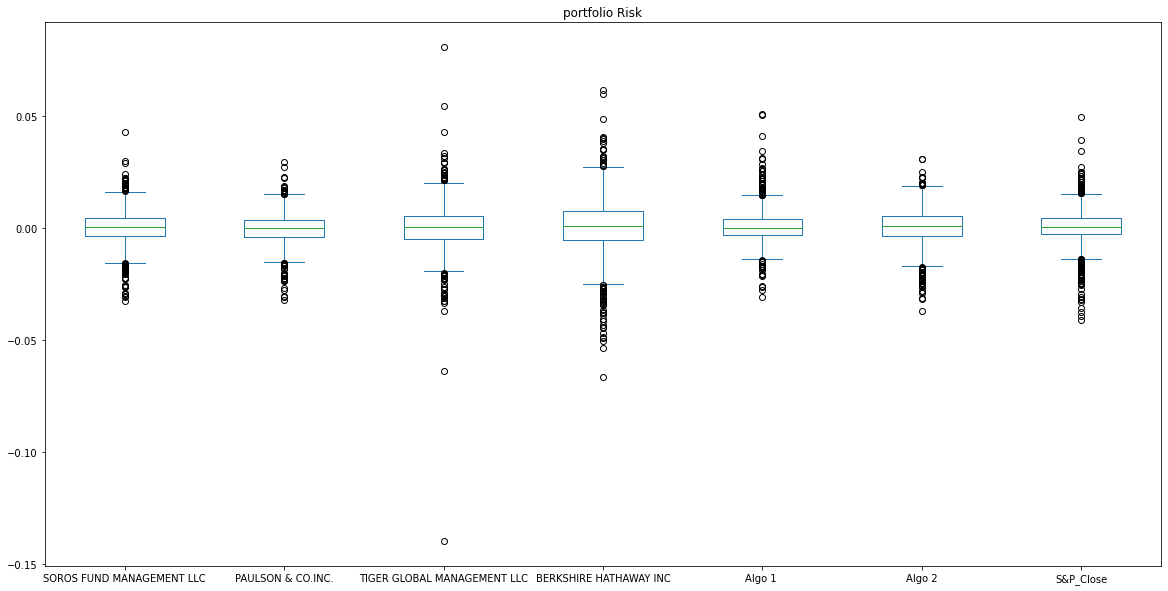

In [27]:

daily_oringinal_returns.plot.box(title= "portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

Calculate the daily standard deviations of all portfolios

In [28]:

daily_oringinal_returns_std = daily_oringinal_returns.std().sort_values(ascending=False)
print(daily_oringinal_returns.std().sort_values(ascending=False))




BERKSHIRE HATHAWAY INC         0.012923
TIGER GLOBAL MANAGEMENT LLC    0.010899
S&P_Close                      0.008556
Algo 2                         0.008346
SOROS FUND MANAGEMENT LLC      0.007899
Algo 1                         0.007623
PAULSON & CO.INC.              0.007025
dtype: float64


### Determine which portfolios are riskier than the S&P 500

Calculate  the daily standard deviation of S&P 500

In [29]:

SP_Close_std = SP_Close.std().sort_values(ascending=False)
print(SP_Close_std)





S&P 500 Daily Close    0.008111
dtype: float64


Determine which portfolios are riskier than the S&P 500


In [30]:
#daily_std = 0.008111

vol = cumulative_returns.std()
print(vol)



SOROS FUND MANAGEMENT LLC      0.075411
PAULSON & CO.INC.              0.092939
TIGER GLOBAL MANAGEMENT LLC    0.132878
BERKSHIRE HATHAWAY INC         0.223534
Algo 1                         0.179865
Algo 2                         0.129523
S&P_Close                      0.136570
dtype: float64


Portfolio riskier than the S&P 500

In [31]:
vol.loc[vol > 0.2]
                  


BERKSHIRE HATHAWAY INC    0.223534
dtype: float64

Calculate the annualized standard deviation (252 trading days)

In [32]:
annual_returns = daily_oringinal_returns.mean() * 252
#Show data
annual_returns

SOROS FUND MANAGEMENT LLC      0.045020
PAULSON & CO.INC.             -0.052759
TIGER GLOBAL MANAGEMENT LLC   -0.020836
BERKSHIRE HATHAWAY INC         0.129230
Algo 1                         0.167401
Algo 2                         0.066689
S&P_Close                      0.089208
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day STD of All Returns'}, xlabel='Date'>

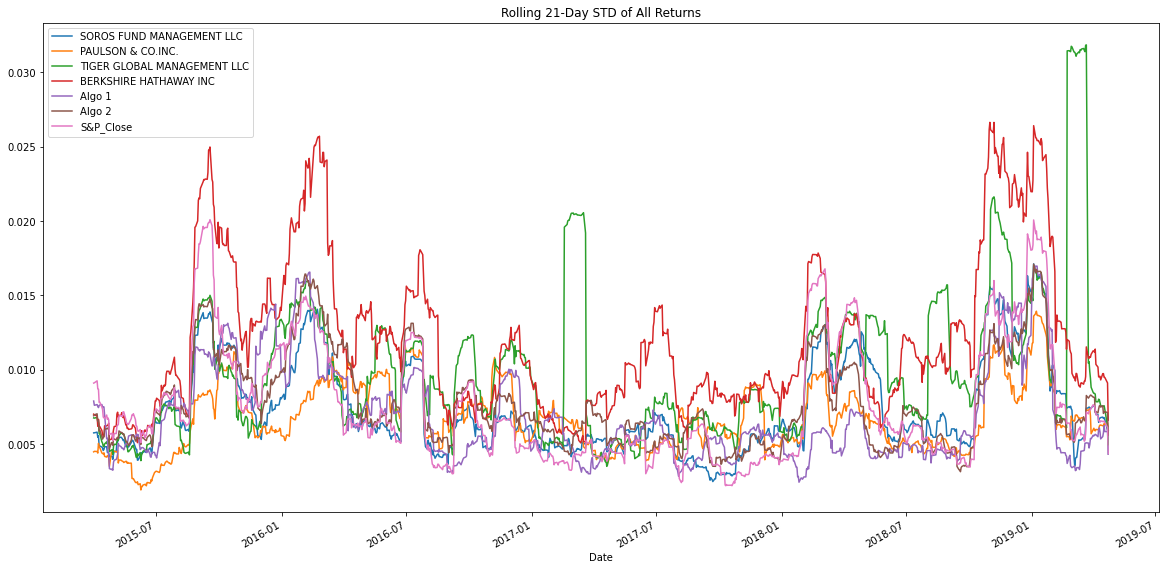

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_oringinal_returns_std = daily_oringinal_returns.rolling(window=21).std()
#print(daily_retruns_of_all_assets.rolling(window=21).std())

# Plot the rolling standard deviation
daily_oringinal_returns_std.plot(figsize=(20, 10), title='Rolling 21-Day STD of All Returns')


### Calculate and plot the correlation

In [34]:
# Calculate the correlation
correlation = daily_oringinal_returns.corr()


correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699961,0.561246,0.754385,0.321175,0.826869,0.837908
PAULSON & CO.INC.,0.699961,1.000000,0.434551,0.545465,0.268692,0.678214,0.669612
TIGER GLOBAL MANAGEMENT LLC,0.561246,0.434551,1.000000,0.424465,0.164384,0.507414,0.624023
BERKSHIRE HATHAWAY INC,0.754385,0.545465,0.424465,1.000000,0.291912,0.688112,0.751297
Algo 1,0.321175,0.268692,0.164384,0.291912,1.000000,0.288214,0.279366
Algo 2,0.826869,0.678214,0.507414,0.688112,0.288214,1.000000,0.858828
S&P_Close,0.837908,0.669612,0.624023,0.751297,0.279366,0.858828,1.000000


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Display correlation matrix

<AxesSubplot:>

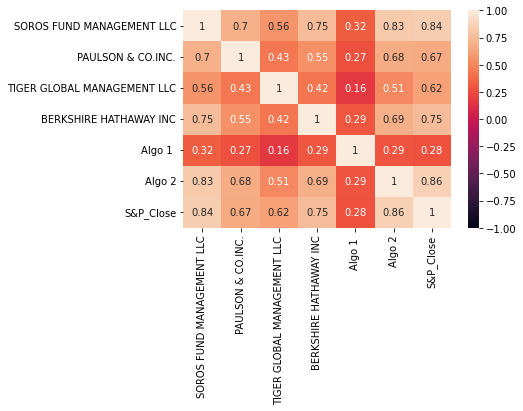

In [36]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [37]:
# Calculate covariance of a single portfolio
algo_covariance = algo_returns.cov()
algo_covariance




,Algo 1,Algo 2
Algo 1,0.000064,0.000023
Algo 2,0.000023,0.000072


In [38]:
# Calculate variance of S&P 500
covariance = SP_Close.cov()
covariance

,S&P 500 Daily Close
S&P 500 Daily Close,0.000066


In [39]:
# Computing beta SP 500 and Algo
# Find covariance of both Algo and SP 500

# Create a new pivot table where the columns are the closing prices for each ticker
combined_Algo_SP_df = pd.concat([algo_returns, SP_Close], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)

combined_Algo_SP_df.sort_index(axis="columns", ascending=True, inplace=False)


# Set column names to "Algo 1", "Algo 2", "S&P 500"
combined_Algo_SP_df.columns = ["Algo 1", "Algo 2", "S&P 500"]
print(combined_Algo_SP_df.columns)




Index(['Algo 1', 'Algo 2', 'S&P 500'], dtype='object')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [40]:
# Use `ewm` to calculate the rolling window

daily_oringinal_returns.ewm(halflife=21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-05,0.001263,0.000590,0.003457,0.001777,0.005398,0.001348,0.003949
2015-03-06,0.006489,0.004234,0.005474,0.010891,0.003788,0.008693,0.007852
2015-03-09,0.005292,0.003763,0.006295,0.008827,0.003085,0.007205,0.008090
2015-03-10,0.006429,0.004656,0.007528,0.008550,0.003115,0.008046,0.009347
2015-03-11,0.006321,0.004589,0.007201,0.007621,0.004103,0.007326,0.008487
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Annualized Sharpe Ratios
sharpratios=(daily_oringinal_returns.mean()*252)/(daily_oringinal_returns.std()*np.sqrt(252))
sharpratios

SOROS FUND MANAGEMENT LLC      0.359034
PAULSON & CO.INC.             -0.473108
TIGER GLOBAL MANAGEMENT LLC   -0.120425
BERKSHIRE HATHAWAY INC         0.629941
Algo 1                         1.383268
Algo 2                         0.503342
S&P_Close                      0.656761
dtype: float64

<AxesSubplot:title={'center':'sharpratios'}>

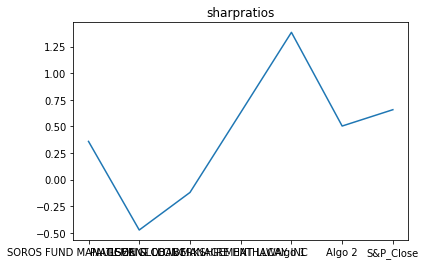

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpratios.plot(title='sharpratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [43]:
# Reading data from 1st stock, Bitfarms Ltd.(BITF)

BITF_Close_Prices_csv = Path("Resources\BITF _Close_Prices.csv")
BITF_Close_Prices_data = pd.read_csv(BITF_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
BITF_Close_Prices_data.sort_index(inplace = True)
BITF_Close_Prices_data.head()








FileNotFoundError: [Errno 2] No such file or directory: 'Resources\\BITF _Close_Prices.csv'

In [ ]:
# Reading data from 2nd stock, MicroStrategy (MSTR)

MSTR_Close_Prices_csv = Path("Resources\MSTR_Close_Prices.csv")
MSTR_Close_Prices_data = pd.read_csv(MSTR_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
MSTR_Close_Prices_data.sort_index(inplace = True)
MSTR_Close_Prices_data.head()





In [ ]:
# Reading data from 3rd stock, Grayscale Bitcoin Trust (GBTC)
GBTC_Close_Prices_csv = Path("Resources\GBTC _Close_Prices.csv")
GBTC_Close_Prices_data = pd.read_csv(GBTC_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
GBTC_Close_Prices_data.sort_index(inplace = True)
GBTC_Close_Prices_data.head()

In [ ]:
# Combine all stocks in a single DataFrame
Joined_Custom_org_df = pd.concat([BITF_Close_Prices_data, MSTR_Close_Prices_data, GBTC_Close_Prices_data], axis="columns", join="inner")
Joined_Custom_org_df.head(5)





In [ ]:
# Calculate daily returns
Joined_Custom_org_df_daily_returns = Joined_Custom_org_df.pct_change()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
BITF_weight = 0.3
MSTR_weight = 0.3
GBTC_weight = 0.3

In [ ]:
custom_portfolio__weighted_returns = (BITF_weight * Joined_Custom_org_df)  + (MSTR_weight * Joined_Custom_org_df) + (GBTC_weight * Joined_Custom_org_df)
custom_portfolio__weighted_returns.head(5)

In [ ]:
# Reset Date index
Joined_Custom_org_df = Joined_Custom_org_df.reset_index()





In [ ]:
# Reorganize portfolio data by having a column per symbol

Joined_Custom_org_df_daily_returns.columns = ["BITF", "MSTR", "GBTC"]



In [ ]:



# Drop NAs
Joined_Custom_org_df_daily_returns.dropna().head(5)


# Display sample data





## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
#all_closing_prices

In [ ]:
#daily_oringinal_returns.index
Joined_Custom_org_df_daily_returns.index

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
Joined_Cus_Org_data = pd.concat([Joined_Custom_org_df_daily_returns, daily_oringinal_returns], axis = "columns", join = "inner")
Joined_Cus_Org_data

In [ ]:

# Sort datetime index in ascending order (past to present)

#print(Joined_Custom_org_df)

# Set column names to


#Joined_Custom_org_df= Joined_Custom_org_df.pivot_table(values="Close_Prices", index="Date", columns="Custom and Org Returns")
#Joined_Custom_org_df.head()


#Joined_Custom_org_df.columns = ["BITF_Close_Prices", "MSTR_Close_Price", "GBTC_Close_Prices", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO INC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "sp500_Closing_Prices"]

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!